# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Marfa Audilla Fitri
- **Email:** marfa.audilla.fitri-2021@fst.unair.ac.id
- **ID Dicoding:** marfaaudilla

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berubah sepanjang tahun?
- Bagaimana penggunaan sepeda berbeda antara hari kerja dan hari libur?
- Bagaimana penggunaan sepeda dipengaruhi oleh kondisi cuaca?
- Apa korelasi tertinggi antar variabel pada dataset?

## Import Semua Packages/Library yang Digunakan

In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


## Data Wrangling

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

In [7]:
sns.set(style='whitegrid')

### Gathering Data




#### Membuat data frame day

In [9]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membuat data frame hour

In [10]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing data frame **day**

In [ ]:
#Memeriksa tipe data per kolom
day_df.info()

>Tidak ada masalah tipe data dan missing value pada `day_df`.

In [10]:
#Menampilkan statistika deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Memeriksa data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

>Tidak ada data yang terduplikasi pada `day_df`

#### Assessing data frame **hour**

In [ ]:
#Memeriksa tipe data per kolom
hour_df.info()

>Tidak ada masalah tipe data dan missing value pada `hour_df`.

In [ ]:
#Menampilkan statistika deskriptif
hour_df.describe()

In [ ]:
#Memeriksa data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

>Tidak ada data yang terduplikasi pada `day_df`

### Cleaning Data

#### Data frame **day**

In [27]:
#menghapus kolom yang tidak diperlukan
day_df.drop(['temp','atemp','hum'], axis=1, inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.186900,82,1518,1600


In [28]:
#memeriksa missing values tiap kolom
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Data frame **hour**

#### Data frame **hour**

In [29]:
#menghapus kolom yang tidak diperlukan
hour_df.drop(['temp','atemp','hum'], axis=1, inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.0,0,1,1


In [30]:
#memeriksa missing values tiap kolom
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Exploratory **day** and **hour**

In [48]:
#Rangkuman parameter statistik dari data day
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [59]:
#menggabungkan day dan hari
day_hour_df = pd.merge(
   left=day_df,
   right=hour_df,
   how="left",
   left_on="instant",
   right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
print("Jumlah duplikasi: ",dayy_df.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
#menampilkan demografi sepeda berdasarkan musim
day_df.groupby(by=["season"]).agg({
    "instant" : "nunique",
    "cnt" : ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [56]:
dayy_df.isna().sum()

instant         0
dteday_x        0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
dteday_y        0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

In [62]:
#menampilkan jumlah sepeda berdasarkan musim dan bulan
dayy_df.groupby(by=["season_x", "mnth_x"]).agg({
    "instant":"count"
})

instant
season_x mnth_x         
1        1            62
         2            57
         3            40
         12           22
2        3            22
         4            60
         5            62
         6            40
3        6            20
         7            62
         8            62
         9            44
4        9            16
         10           62
         11           60
         12           40

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat Pola penggunaan sepeda yang berkaitan dengan musim atau bulan tertentu

In [63]:

# Mengelompokkan data berdasarkan bulan dan menghitung total sepeda yang dipinjam
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()

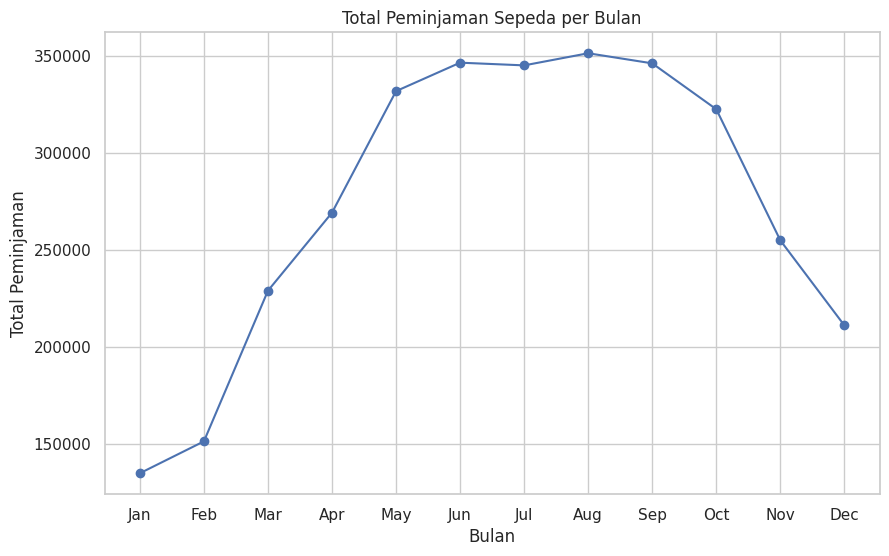

In [64]:
#Membuat diagram garis untuk pola penggunaan sepeda
plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='line', marker='o')
plt.title('Total Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

>Berdasarkan diagram garis di atas, dapat dilihat bahwa total peminjaman sepeda tertinggi terjadi pada saat `bulan Agustus`. Sementara itu, peminjaman sepeda terendah terjadi pada saat `bulan Januari`

In [17]:
# Mengelompokkan data berdasarkan musim dan menghitung total sepeda yang dipinjam
season_rentals = day_df.groupby('season')['cnt'].sum()

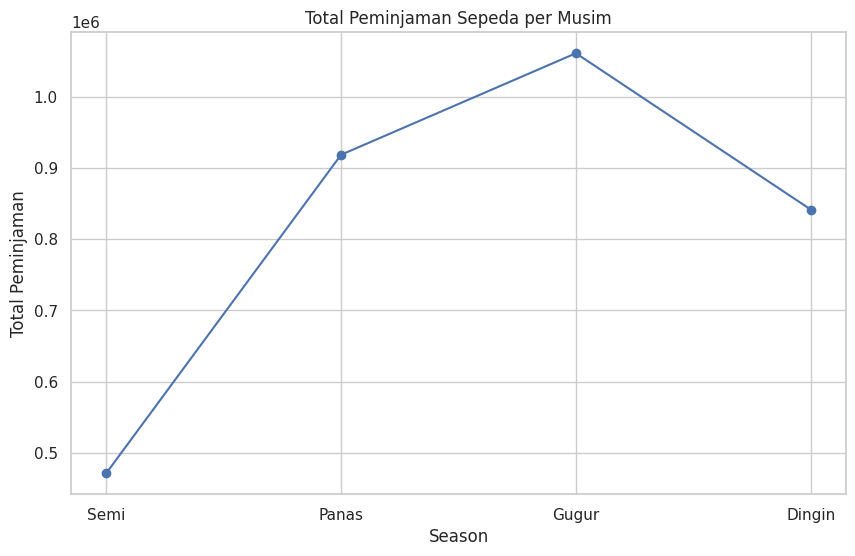

In [18]:
#Membuat diagram garis untuk pola penggunaan sepeda
plt.figure(figsize=(10, 6))
season_rentals.plot(kind='line', marker='o')
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Season')
plt.ylabel('Total Peminjaman')
plt.xticks(range(1, 5), ['Semi', 'Panas','Gugur','Dingin'])
plt.grid(True)
plt.show()

>Berdasarkan diagram garis di atas, dapat dilihat bahwa total peminjaman sepeda tertinggi terjadi pada saat `musim gugur`. Sementara itu, di urutan kedua, ketiga, keempat menyusul `musim panas`, `musim dingin`, dan `musim semi`

### Pertanyaan 2: Bagaimana penggunaan sepeda berbeda antara hari kerja dan hari libur?

In [11]:
# Mengelompokkan data berdasarkan jenis hari (hari kerja/hari libur) dan menghitung total sepeda yang dipinjam
rentals_by_holiday = day_df.groupby('holiday')['cnt'].sum()

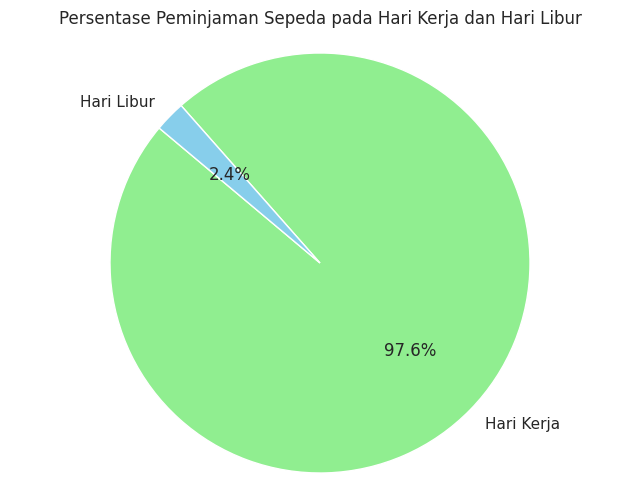

In [19]:
# Visualisasi
plt.figure(figsize=(8, 6))
colors = ['lightgreen', 'skyblue']
plt.pie(rentals_by_holiday, labels=['Hari Kerja', 'Hari Libur'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Peminjaman Sepeda pada Hari Kerja dan Hari Libur')
plt.axis('equal')  # Agar pie chart terlihat bulat
plt.show()

>Berdasarkan diagram lingkaran di atas, dapat dilihat bahwa total peminjaman sepeda tertinggi terjadi pada saat `Hari kerja` yaitu sebanyak 97,6%. Sementara itu, peminjaman sepeda pada `Hari libur` sebanyak 2,4%

### Pertanyaan 3 : Bagaimana penggunaan sepeda dipengaruhi oleh kondisi cuaca?

In [14]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung total sepeda yang dipinjam
rentals_by_weather = day_df.groupby('weathersit')['cnt'].sum()


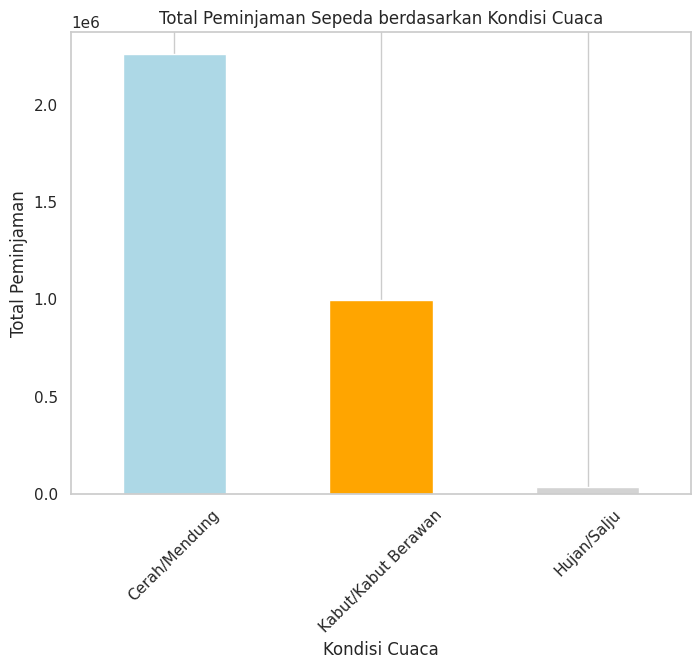

In [15]:
# Visualisasi
plt.figure(figsize=(8, 6))
rentals_by_weather.plot(kind='bar', color=['lightblue', 'orange', 'lightgrey'])
plt.title('Total Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Peminjaman')
plt.xticks([0, 1, 2], ['Cerah/Mendung', 'Kabut/Kabut Berawan', 'Hujan/Salju'], rotation=45)
plt.grid(axis='y')
plt.show()

>Berdasarkan diagram batang di atas, dapat dilihat bahwa total peminjaman sepeda tertinggi terjadi pada saat `cuaca cerah/mendung`. Sementara itu, di urutan kedua dan ketiga menyusul `kabut/kabut berawan` dan `hujan/salju`

### Pertanyaan 4 : Apa korelasi tertinggi antar variabel pada dataset?

In [20]:
# Membuat matriks korelasi
corr_matrix = day_df.corr()

<ipython-input-20-f81afec9e578>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = day_df.corr()


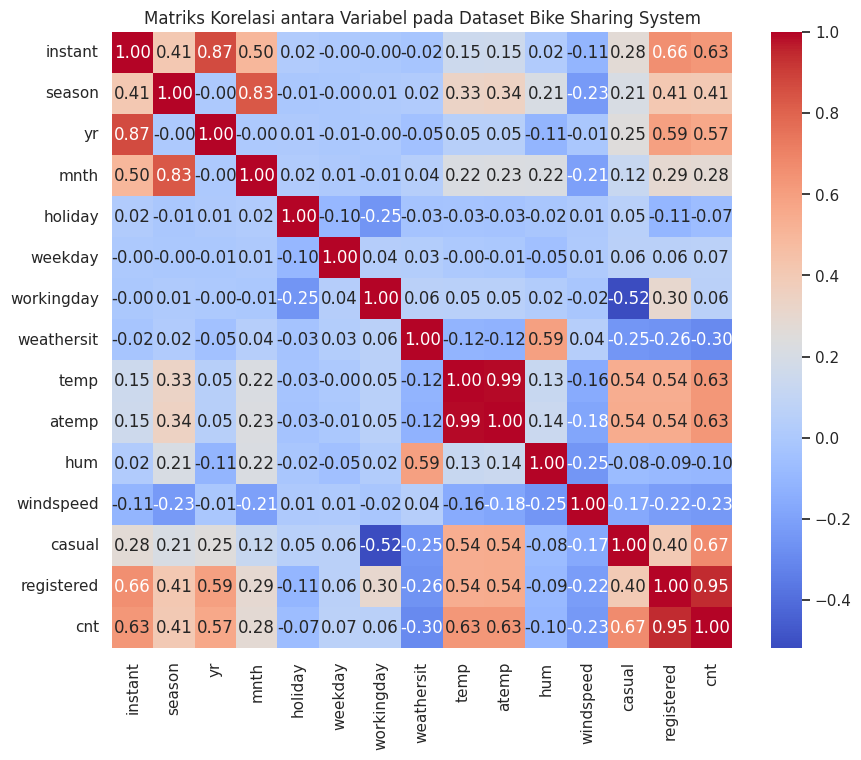

In [21]:
# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara Variabel pada Dataset Bike Sharing System')
plt.show()

>

>Berdasarkan matriks korelasi antar variabel, dapat dilihat bahwa korelasi positif tertinggi ditandai dengan warna merah gelap dan korelasi negatif terendah ditandai dengan warna biru gelap. Korelasi yang mendekati 1 menunjukkan korelasi positif yang kuat, dapat dilihat bahawa korelasi tertinggi yaitu antara variabel `registered` dan `cnt` sebesar 95%. Hal ini menunjukkan bahwa pengguna terdaftar memiliki kontribusi signifikan terhadap total penggunaan sepeda, sedangkan nilai korelasi yang lebih rendah menunjukkan bahwa pengguna terdaftar mungkin memiliki dampak yang lebih kecil terhadap total penggunaan sepeda.

## Conclusion

- Total peminjaman sepeda tertinggi terjadi pada saat bulan Agustus. Sementara itu, peminjaman sepeda terendah terjadi pada saat bulan Januari. Total peminjaman sepeda tertinggi terjadi pada saat musim gugur. Sementara itu, di urutan kedua, ketiga, keempat menyusul musim panas, musim dingin, dan musim semi mendapatkan review terbaik dari costumer.

- Total peminjaman sepeda tertinggi terjadi pada saat `Hari kerja` yaitu sebanyak 97,6%. Sementara itu, peminjaman sepeda pada `Hari libur` sebanyak 2,4%
- total peminjaman sepeda tertinggi terjadi pada saat `cuaca cerah/mendung`. Sementara itu, di urutan kedua dan ketiga menyusul `kabut/kabut berawan` dan `hujan/salju`
- korelasi tertinggi yaitu antara variabel registered dan cnt sebesar 95%. Hal ini menunjukkan bahwa pengguna terdaftar memiliki kontribusi signifikan terhadap total penggunaan sepeda, sedangkan nilai korelasi yang lebih rendah menunjukkan bahwa pengguna terdaftar mungkin memiliki dampak yang lebih kecil terhadap total penggunaan sepeda.